In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import time
import sys
from datetime import datetime, timedelta
from math import sin, cos, asin, sqrt, pi, ceil, floor
from shapely.geometry import Point
from busSim import BusSim
from busSim.fileManager import LocalManager
from busSim.util import transform, gen_locations
%matplotlib inline

ModuleNotFoundError: No module named 'busSim'

In [4]:
DATA_PATH = "./data"
OUTPUT_PATH = "/tmp/output"
DAY = "monday"
START_TIME = "12:00:00"
ELAPSE_TIME = "00:30:00"
AVG_WALKING_SPEED = 1.4 # 1.4 meters per second
MAX_WALKING_MIN = 10
GRID_TIME = 2
START_POINT_NUM = 100

city = gpd.read_file("./data/plot/background/madison-meter-shp")
lakes = gpd.read_file("./data/plot/background/water-meter-shp")
street = gpd.read_file("./data/plot/background/street-meter-shp")
max_x = city.bounds.maxx.max()
min_x = city.bounds.minx.min()
max_y = city.bounds.maxy.max()
min_y = city.bounds.miny.min()

config = {
    "run_env": {
        "backend": "local",
        "credentials": {
            "data_path": DATA_PATH,
            "output_path": OUTPUT_PATH
        }
    },
    "busSim_params": {
        "day": DAY,
        "start_time": START_TIME,
        "elapse_time": ELAPSE_TIME,
        "avg_walking_speed": AVG_WALKING_SPEED,
        "max_walking_min": MAX_WALKING_MIN,
        "grid_size_min": GRID_TIME
        }, 
    "start_points": gen_locations(DATA_PATH, START_POINT_NUM),
    "route_remove": [1, 10]
}

DriverError: ./data/plot/background/madison-meter-shp: No such file or directory

In [ ]:
ts = time.time()
result = BusSim.run(config)
te = time.time()
te - ts

In [2]:
def plot_grid(grid):
    ax = city.plot(color="lightgray", alpha=.2, figsize=(12, 12), zorder=2)
    lakes.plot(color="lightblue", ax=ax, zorder=1, alpha=0.8)
    street.plot(color="darkgray", alpha = .5, ax=ax, zorder=3)
    ax_y_min, ax_y_max = ax.get_ylim()

    grid_size = GRID_TIME * AVG_WALKING_SPEED * 60
    # idea: for each bubble, first treat it as a square, calculate the min/ max grid index for x and y, determine the grid it contains
    for y, row in enumerate(grid):
        for x, bit in enumerate(row):
            xmin = grid_size * x + min_x
            xmax = grid_size + xmin
            ymin = (grid_size * y + min_y - ax_y_min) / (ax_y_max - ax_y_min)
            ymax = (grid_size * (y+1) + min_y - ax_y_min) / (ax_y_max - ax_y_min)
            if bit == 1:
                plt.axvspan(xmin, xmax, ymin, ymax, alpha=.7, zorder=4, ec='k', color="red")

    plt.show()

In [3]:
manager = LocalManager(DATA_PATH, OUTPUT_PATH)
busSim = BusSim(manager, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN)
grid = busSim.get_access_grid(start_point=(43.073691, -89.387407), grid_size_min=GRID_TIME)
plot_grid(grid)

NameError: name 'LocalManager' is not defined

32090055.215094768


<AxesSubplot:>

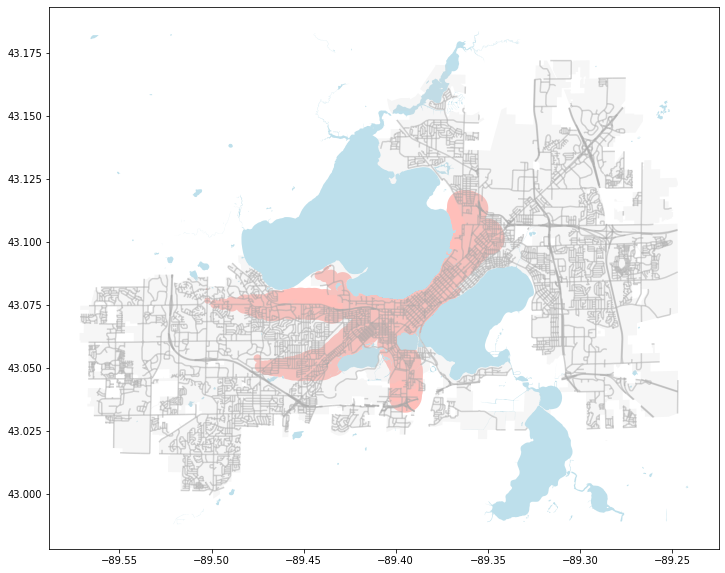

In [10]:
gdf = busSim.get_gdf(start_point=(43.073691, -89.387407))
print(busSim.get_area(gdf)) #32092971.01932718 #32090055.215094768 #29996282.357075594

gdf = gdf.to_crs(epsg=4326)
city = gpd.read_file("./data/plot/background/madison-shp")
lakes = gpd.read_file("./data/plot/background/water-shp")
street = gpd.read_file("./data/plot/background/street-shp")

ax = city.plot(color="lightgray", alpha=.2, figsize=(12, 12), zorder=2)
lakes.plot(color="lightblue", ax=ax, zorder=1, alpha=0.8)
street.plot(color="darkgray", alpha = .5, ax=ax, zorder=3)
gdf.difference(lakes.unary_union).plot(color="#ffbfba", ax=ax)
# gdf["geometry"].centroid.plot(color="red", ax=ax, markersize=2)

In [11]:
busSim.stopTimes_final_df["route_short_name"].unique()

array([ 2, 70,  8,  7, 10,  4, 30,  6, 39, 31,  5, 21, 17, 20, 15, 16, 80,
       18, 40, 50, 22, 26, 73, 67, 52, 13, 36, 32])